# <center>Classification des chiffres manuscrites</center>

## Partie 1 : Base de données, Analyse et Préparation

In [1]:
import os
import struct
import sys
import numpy as np
import cv2
from sklearn.model_selection import train_test_split
from PIL import Image 
import matplotlib.pyplot as plt

## Dossier "training"

In [2]:
from tqdm import tqdm

directory = ".\\data\\MNIST_Dataset_JPG_format\\MNIST_JPG_training\\"

liste_images = []
# liste pour enregistrer les labels
labels_train = []
# l va servir à numéroter les labels : dans la boucle, l s'incrémente de 1 à chaque passage 
l = -1


for x in tqdm(os.listdir(directory)):
    # incrémentation de l
    l = l +1
    for y in os.listdir(directory + x +"\\"):
        image = cv2.imread(directory + x +"\\"+y)
        liste_images.append(image)
        labels_train.append(l)

100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:31<00:00,  3.15s/it]


In [3]:
# liste des dossiers
os.listdir(directory)

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

## Informations

In [4]:
liste_images = np.array(liste_images)

print( 'classe :', type(liste_images) )
print( 'type :', liste_images.dtype )
print( 'taille :', liste_images.shape )
print( 'modifiable :', liste_images.flags.writeable )

classe : <class 'numpy.ndarray'>
type : uint8
taille : (60000, 28, 28, 3)
modifiable : True


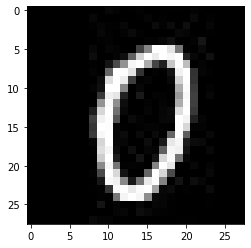

In [5]:
plt.imshow( liste_images[1] )
plt.show()

## Nuance de Gris

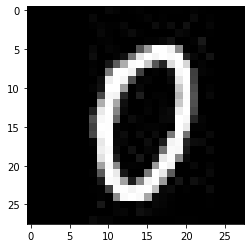

In [6]:
grey_image = cv2.cvtColor(liste_images[1], cv2.COLOR_RGB2GRAY)
plt.imshow(grey_image, cmap = 'Greys_r')
plt.show()

In [7]:
liste_gris = []

for x in tqdm(liste_images):
    grey_image = cv2.cvtColor(x, cv2.COLOR_RGB2GRAY)
    liste_gris.append(grey_image)
        

100%|████████████████████████████████████████████████████████████████████████| 60000/60000 [00:00<00:00, 102495.76it/s]


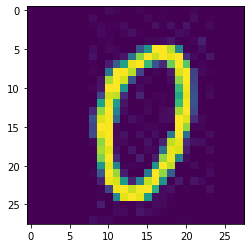

In [8]:
plt.imshow(liste_gris[1])
plt.show()

In [9]:
liste_gris[1].shape

(28, 28)

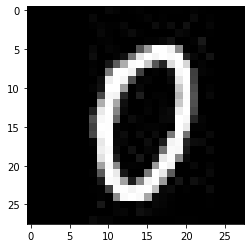

In [10]:
plt.imshow(liste_gris[1], cmap = 'Greys_r')
plt.show()

## Dossier "testing"

In [11]:
directory = ".\\data\\MNIST_Dataset_JPG_format\\MNIST_JPG_testing\\"

liste_images_test = []
# liste pour enregistrer les labels
labels_test = []
# l va servir à numéroter les labels : dans la boucle, l s'incrémente de 1 à chaque passage 
l = -1


for x in tqdm(os.listdir(directory)):
    # incrémentation de l
    l = l +1
    for y in os.listdir(directory + x +"\\"):
        image = cv2.imread(directory + x +"\\"+y)
        liste_images_test.append(image)
        labels_test.append(l)

100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:06<00:00,  1.52it/s]


In [12]:
# liste des dossiers
os.listdir(directory)

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

In [13]:
liste_images_test = np.array(liste_images_test)

print( 'classe :', type(liste_images_test) )
print( 'type :', liste_images_test.dtype )
print( 'taille :', liste_images_test.shape )
print( 'modifiable :', liste_images_test.flags.writeable )

classe : <class 'numpy.ndarray'>
type : uint8
taille : (10000, 28, 28, 3)
modifiable : True


In [14]:
liste_gris_test = []

for x in tqdm(liste_images_test):
    grey_image = cv2.cvtColor(x, cv2.COLOR_RGB2GRAY)
    liste_gris_test.append(grey_image)

100%|█████████████████████████████████████████████████████████████████████████| 10000/10000 [00:00<00:00, 74628.03it/s]


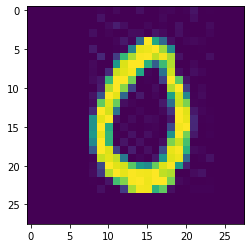

In [15]:
plt.imshow(liste_gris_test[1])
plt.show()

In [16]:
liste_gris_test[1].shape

(28, 28)

---

## Partie 2 : Architecture CNN sur Tensorflow

In [17]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [18]:
liste_gris_train = np.array(liste_gris)

print( 'classe :', type(liste_gris_train) )
print( 'type :', liste_gris_train.dtype )
print( 'taille :', liste_gris_train.shape )
print( 'modifiable :', liste_gris_train.flags.writeable )

classe : <class 'numpy.ndarray'>
type : uint8
taille : (60000, 28, 28)
modifiable : True


In [185]:
liste_gris_test = np.array(liste_gris_test)

print( 'classe :', type(liste_gris_test) )
print( 'type :', liste_gris_test.dtype )
print( 'taille :', liste_gris_test.shape )
print( 'modifiable :', liste_gris_test.flags.writeable )

classe : <class 'numpy.ndarray'>
type : uint8
taille : (10000, 28, 28)
modifiable : True


In [19]:
# Normalisation pixel (entre 0 et 1)
train_images, test_images = liste_gris_train / 255.0, liste_gris_test / 255.0

TypeError: unsupported operand type(s) for /: 'list' and 'float'

In [ ]:
class_names = ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"]

plt.figure(figsize=(10,10))

for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(liste_gris_train[i])
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[labels_train[i]])
    
plt.show()

In [20]:
model = models.Sequential()
model.add(layers.Conv2D(28, (3, 3), activation='relu', input_shape=(28, 28, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 28)        784       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 28)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        16192     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
Total params: 53,904
Trainable params: 53,904
Non-traina

In [22]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 28)        784       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 28)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        16192     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 576)               0

In [24]:
labels_test= np.array(labels_test)
labels_train = np.array(labels_train)

labels_test.shape
labels_train.shape

print(liste_gris_train.shape)
print(liste_gris_test.shape)

(60000, 28, 28)


AttributeError: 'list' object has no attribute 'shape'

In [248]:
X_train = tf.expand_dims(liste_gris_train, axis=-1)

In [241]:
X_test = tf.expand_dims(liste_gris_train, axis=-1)

In [243]:
y_test = tf.expand_dims(liste_gris_train, axis=-1)

In [244]:
y_train = tf.expand_dims(liste_gris_train, axis=-1)

In [249]:
X_train.shape

TensorShape([60000, 1, 28, 28])

In [250]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(liste_gris_train, labels_train, epochs=10, 
                    validation_data=(liste_gris_test, labels_test))

Epoch 1/10


ValueError: in user code:

    File "C:\Users\utilisateur\anaconda3\lib\site-packages\keras\engine\training.py", line 1021, in train_function  *
        return step_function(self, iterator)
    File "C:\Users\utilisateur\anaconda3\lib\site-packages\keras\engine\training.py", line 1010, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\utilisateur\anaconda3\lib\site-packages\keras\engine\training.py", line 1000, in run_step  **
        outputs = model.train_step(data)
    File "C:\Users\utilisateur\anaconda3\lib\site-packages\keras\engine\training.py", line 859, in train_step
        y_pred = self(x, training=True)
    File "C:\Users\utilisateur\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 67, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\utilisateur\anaconda3\lib\site-packages\keras\engine\input_spec.py", line 228, in assert_input_compatibility
        raise ValueError(f'Input {input_index} of layer "{layer_name}" '

    ValueError: Exception encountered when calling layer "sequential_9" (type Sequential).
    
    Input 0 of layer "conv2d_25" is incompatible with the layer: expected min_ndim=4, found ndim=3. Full shape received: (32, 28, 28)
    
    Call arguments received:
      • inputs=tf.Tensor(shape=(32, 28, 28), dtype=uint8)
      • training=True
      • mask=None
